# ACOM Tutorial Notebook - Basics

In this tutorial, you will learn the basic concepts and syntax of the ACOM module in py4DSTEM.  

### Acknowledgements

This tutorial notebook was written by Colin Ophus and Steven Zeltmann. Contact clophus@lbl.gov with any questions.

### Versioning

Last updated on 2022-01-13 with py4DSTEM v.0.12.6.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import py4DSTEM
import numpy as np

In [3]:
# Define titanium structure using manual input of the crystal structure
pos = np.array([
    [1/3, 2/3, 0.25],
    [2/3, 1/3, 0.75],
])

atom_num = 22

a = 2.95
c = 4.69
alpha = 90.0
gamma = 120.0

cell = [a,a,c,alpha,alpha,gamma]

crystal = py4DSTEM.process.diffraction.Crystal(
    pos, 
    atom_num, 
    cell)

In [4]:
# # Import the titanium structure directly from The Material Project
# crystal = py4DSTEM.process.diffraction.Crystal.from_pymatgen_structure(
#     "mp-46",
# #     MP_key = "insert your own API key here!", 
# )

### Hexagonal indexing

The py4DSTEM ACOM module now supports hexagonal indexing, which we will demonstrate here.

In [5]:
print(crystal.rational_ind(crystal.lattice_to_hexagonal([1,0,0])), 
      crystal.rational_ind(crystal.lattice_to_hexagonal([0,1,0])),
      crystal.rational_ind(crystal.lattice_to_hexagonal([-1,-1,0])))

[ 2 -1 -1  0] [-1  2 -1  0] [-1 -1  2  0]


In [6]:
print(crystal.rational_ind(crystal.lattice_to_hexagonal([1,2,0])), 
      crystal.rational_ind(crystal.lattice_to_hexagonal([2,1,0])),
      crystal.rational_ind(crystal.lattice_to_hexagonal([-1,1,0])))

[ 0  1 -1  0] [ 1  0 -1  0] [-1  1  0  0]


In [7]:
print(crystal.rational_ind(crystal.hexagonal_to_lattice([2,-1,-1,0])), 
      crystal.rational_ind(crystal.hexagonal_to_lattice([-1,2,-1,0])),
      crystal.rational_ind(crystal.hexagonal_to_lattice([-1,-1,2,0])))

[1 0 0] [0 1 0] [-1 -1  0]


In [9]:
print(crystal.rational_ind(crystal.hexagonal_to_lattice([0,1,-1,0])), 
      crystal.rational_ind(crystal.hexagonal_to_lattice([1,0,-1,0])),
      crystal.rational_ind(crystal.hexagonal_to_lattice([-1,1,0,0])))

[1 2 0] [2 1 0] [-1  1  0]


In [10]:
# For arbitrary directions, the output crystallographic vectors may have large integer values:
print(crystal.rational_ind(crystal.lattice_to_hexagonal([-0.22,0.79,0.13])))

[-41  60 -19  13]


### Structure visualization

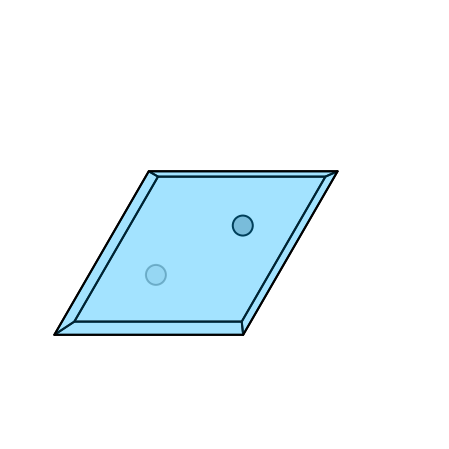

In [11]:
# Plot the structure
fig, ax = crystal.plot_structure(
    returnfig=True,
    # zone_axis_lattice=[0,0,1],
    camera_dist=8,
)

In [12]:
# Save the structure plot
# fig.savefig('plot_00_atomic_struct.pdf')

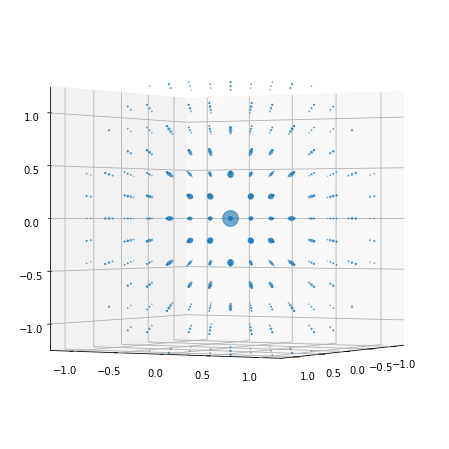

In [13]:
k_max = 1.5
crystal.calculate_structure_factors(k_max)

fig, ax = crystal.plot_structure_factors(
    # zone_axis_lattice=[1,0,-1,0],
    # zone_axis_lattice=[1,-1,0,0],
    # zone_axis_lattice=[0,1,-1,0],
    zone_axis_lattice=[1,1,-2,0],
    # zone_axis_lattice=[1,1,-2,0],
    # zone_axis_lattice=[1,1,-2,0],
    plot_limit=1.2,
    returnfig=True)

In [14]:
# Save the structure factor plot
# fig.savefig('plot_01_structure_factors.pdf')

### Generate and plot some diffraction patterns

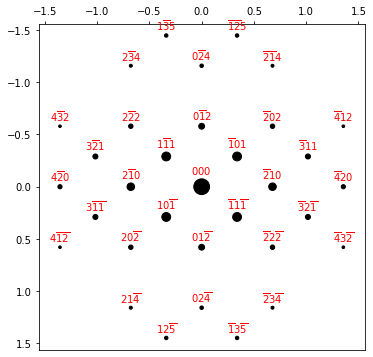

In [16]:
# Hexagonal zone
# zone_axis_test = [0,0,0,1]  # Zone axis

# 10-10 type zones
# zone_axis_test = [1,-1,0,0]  # Zone axis
# zone_axis_test = [1,0,-1,0]  # Zone axis
# zone_axis_test = [0,1,-1,0]  # Zone axis

# 11-20 type zones
# zone_axis_test = [1,1,-2,0]  # Zone axis
# zone_axis_test = [1,-2,1,0]  # Zone axis
zone_axis_test = [-2,1,1,0]  # Zone axis

# other zones
# zone_axis_test = [0,1,1]  # 1-213
# zone_axis_test = [1,-2,1,3] 

# zone_axis_test = [0,2,1]  # -24-23
# zone_axis_test = [-2,4,-2,3] 

# zone_axis_test = [1,2,1]  # 01-11
zone_axis_test = [0,1,-1,1] 

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis_lattice = zone_axis_test,
    sigma_excitation_error=0.02,
#     tol_intensity=0,
)

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks,
    figsize=(6,6),
)

### Testing orientation matching

In [17]:
# # Create an orientation plan
# crystal.orientation_plan(
#     angle_step_zone_axis = 2.0,
#     angle_step_in_plane = 2.0,
#     accel_voltage = 300e3,
#     corr_kernel_size=0.08,
# )

# Create an orientation plan with an automatic range of zone axes - this requires pymatgen to be installed!
crystal.orientation_plan(
    angle_step_zone_axis = 2.0,
    angle_step_in_plane = 2.0,
    accel_voltage = 300e3,
    corr_kernel_size=0.08,
    zone_axis_range='auto',
)

Automatically detected point group 6/mmm,
 using arguments: zone_axis_range = 
[[0.8660254 0.5       0.       ]
 [1.        0.        0.       ]], 
 fiber_axis=None, fiber_angles=None.


Orientation plan: 100%|███████████████████████████████████████████████████| 1081/1081 [00:01<00:00, 869.59 zone axes/s]


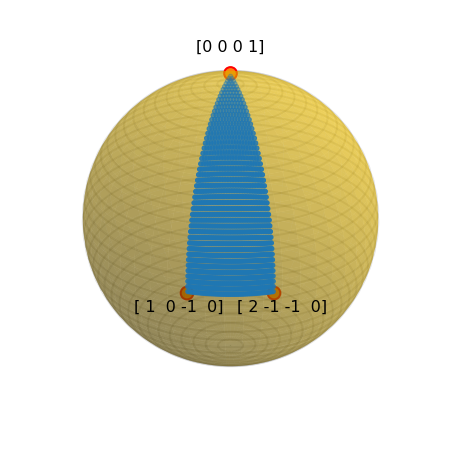

In [19]:
# Plot the zone axes included in the orientation plan
fig, ax = crystal.plot_orientation_zones(
    plot_limit=np.array([-0.8, 0.8]),
    returnfig=True)

In [20]:
# Save the zone axes orientation map
# fig.savefig('plot_02_zone_axes.pdf')

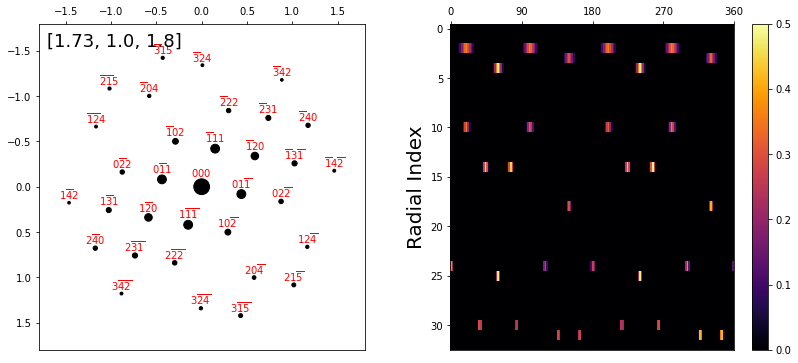

In [21]:
# Plot some of the orientation plan slices
fig, ax = crystal.plot_orientation_plan(
#     zone_axis_plot=[3,0,1],
#     zone_axis_plot=[1,2,3],
    zone_axis_lattice=[1,0,-1,1],
    returnfig=True,
);

In [40]:
# Save the zone axes orientation map
# fig.savefig('plot_03_plan_05.pdf')

Best fit lattice directions: z axis = ([ 0.464 -0.089 -0.375  0.463]), x axis = ([ 0.461 -0.085 -0.376  0.464]), with corr value = 0.929


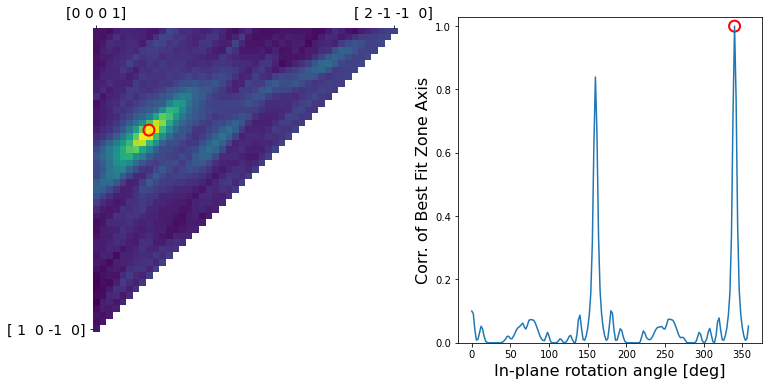

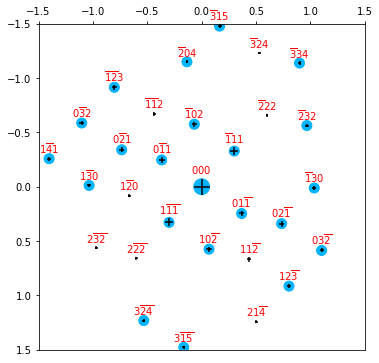

In [22]:
# Testing some matches - this cell shows the orientation correlogram, and the best match for both zone axis and in-plane rotation.
# zone_axis_test = [1,1,-2,1]
# zone_axis_test = [2,1,-3,2]
# zone_axis_test = [2,1,-3,-2]
# zone_axis_test = [1,0.1,0.2];
# proj_x_test = [-0.24,0.56,0]

# zone_axis_test = [2,-1,-1,3]
# proj_x_test = [0,1,0]


zone_axis_test = [0.24,-0.45,0.37]


bragg_peaks, orientation_input = crystal.generate_diffraction_pattern(
    zone_axis_lattice = zone_axis_test,
#     proj_x_cartesian = proj_x_test,
    sigma_excitation_error=0.02,
    return_orientation_matrix=True,
)

# # Print out zone axes after normalization
# zone_axis_test = np.array(zone_axis_test)
# if zone_axis_test.shape[0] == 4:
#     zone_axis_test = crystal.hexagonal_to_lattice(zone_axis_test)
# print('Input lattice zone axis    = (' + str(np.round(zone_axis_test,decimals=3)) + ')')

# Perform matching, and plot correlation images
orientation, fig, ax = crystal.match_single_pattern(
    bragg_peaks,
    figsize=[12,6],
    plot_corr=True,
    verbose=True,
    returnfig=True,
)

# plot the match overlaid onto the input data
bragg_peaks_fit = crystal.generate_diffraction_pattern(
    orientation,
    sigma_excitation_error=0.03)
py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks_fit,
    bragg_peaks_compare=bragg_peaks,
    min_marker_size=100,
    plot_range_kx_ky=[k_max,k_max],
    figsize=(6,6)
)

In [ ]:
# Save the correlation outputs
# fig.savefig('plot_04_match_00.pdf')